In [28]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Reshape, Flatten, LeakyReLU, Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.backend import clear_session
from keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm_notebook
from tqdm import tqdm
from numpy.random import seed
import tensorflow as tf
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import os

In [29]:
#Data Parameters
num_of_classes = 54
data_shape = (119,1)
threshold = 0

#MLP Parameters
times_to_run = 10 #Number of times to run MLP model
mlp_epochs = 40
valid_split = 0.20

#Random Seeds
selection_seed = 150
seed_multiplier = 1000000

In [30]:
path1 = "./data_last/gan_2500_mean/output_features.csv"
path2 = "./data_last/gan_2500_mean/output_labels.csv"
path3 = "./data_last/gan_2500_mean/X_train.csv"
path4 = "./data_last/gan_2500_mean/Y_train.csv"
path5 = "./data_last/gan_2500_mean/X_test.csv"
path6 = "./data_last/gan_2500_mean/Y_test.csv"

train_gan = pd.read_csv(path1,header=None)
labels_gan = pd.read_csv(path2,header=None)

train_real = pd.read_csv(path3,header = None)
labels_real = pd.read_csv(path4,header=None)

x_test = pd.read_csv(path5,header=None)
y_test = pd.read_csv(path6,header=None)

train_gan = np.asarray(train_gan, dtype=np.float32)
labels_gan = np.asarray(labels_gan, dtype=np.int32)
labels_gan = labels_gan.reshape(len(train_gan),)

train_real = np.asarray(train_real, dtype=np.float32)
labels_real = np.asarray(labels_real, dtype=np.int32)
labels_real = labels_real.reshape(len(train_real),)

x_test = np.asarray(x_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int32)
y_test = y_test.reshape(len(x_test),)

train_gan.shape,labels_gan.shape,train_real.shape,labels_real.shape,x_test.shape,y_test.shape

((912, 119), (912,), (847, 119), (847,), (212, 119), (212,))

In [31]:
train_gan,train_real,x_test

(array([[-110.      , -110.      , -110.      , ...,  -87.      ,
         -110.      , -110.      ],
        [ -85.      , -110.      , -110.      , ..., -110.      ,
         -110.      , -110.      ],
        [-110.      , -110.      , -110.      , ..., -110.      ,
         -110.      , -110.      ],
        ...,
        [-109.994606, -110.00201 , -109.999   , ..., -110.00572 ,
         -110.003845, -110.00009 ],
        [-110.      , -110.      , -110.      , ..., -110.      ,
         -110.      , -110.      ],
        [-110.      , -110.      , -110.      , ..., -110.      ,
         -110.      , -110.      ]], dtype=float32),
 array([[-110., -110., -110., ..., -110., -110., -110.],
        [-110., -110., -110., ..., -110., -110., -110.],
        [-110., -110., -110., ..., -110., -110., -110.],
        ...,
        [-110., -110., -110., ..., -110., -110., -110.],
        [-110., -110., -110., ..., -110., -110., -110.],
        [-110., -110., -110., ..., -110., -110., -110.]], dt

### classification in real data

In [32]:
x_train, y_train = shuffle(train_real, labels_real, random_state=selection_seed)

scaler = StandardScaler().fit(x_train)
X_train_transformed = scaler.transform(x_train)
X_test_transformed = scaler.transform(x_test)
Y_train_encoded = to_categorical(y_train)
Y_test_encoded = to_categorical(y_test)

In [20]:
all_test_loss =[]
all_test_acc = []
history = []

for i in tqdm_notebook(range(times_to_run)):
    seed(i*seed_multiplier)#操作级
    tf.random.set_seed(i*seed_multiplier)#图级
    inp = Input(shape=(data_shape[0],),name='ap_features')
    x = Dense(1024,activation=LeakyReLU(alpha=0))(inp)
    x = Dropout(0.3)(x)
    x = Dense(512,activation=LeakyReLU(alpha=0))(x)
    x = Dropout(0.3)(x)
    x = Dense(256,activation=LeakyReLU(alpha=0))(x)
    x = Dropout(0.3)(x)
    x = Dense(128,activation=LeakyReLU(alpha=0))(x)
    output = Dense(54,activation='softmax')(x)
    model = Model(inp,output)

    model.compile(optimizer=Adam(0.0002,0.05),#learning rate, the exponential decay rate for the 1st moment estimates
                                              # 学习率      , 一阶矩估计的指数衰减率
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history_temp = model.fit(X_train_transformed,
                            Y_train_encoded,
                            epochs=mlp_epochs-10,
                            batch_size=32,
                            validation_split=0.30,
                            verbose=0)
    history.append(history_temp)
    test_loss, test_acc = model.evaluate(X_test_transformed, 
                                         Y_test_encoded, 
                                         verbose=0)
    print("#{} Test acc:".format(i), test_acc)

    all_test_acc.append(test_acc)
    all_test_loss.append(test_loss)
    del(model)
    clear_session()

C:\Users\xfp\AppData\Local\Temp\ipykernel_3824\3744800286.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(times_to_run)):


  0%|          | 0/10 [00:00<?, ?it/s]

#0 Test acc: 0.6556603908538818
#1 Test acc: 0.6886792182922363
#2 Test acc: 0.698113203048706
#3 Test acc: 0.6839622855186462
#4 Test acc: 0.6603773832321167
#5 Test acc: 0.6886792182922363
#6 Test acc: 0.6839622855186462
#7 Test acc: 0.6556603908538818
#8 Test acc: 0.650943398475647
#9 Test acc: 0.6933962106704712


In [21]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors = 1)
knn.fit(train_real,labels_real)
knn_acc = knn.score(x_test,y_test) 
print('the accurancy is: %.4f'%knn_acc)

the accurancy is: 0.7783


(1.1948461055755615, 0.675943398475647)

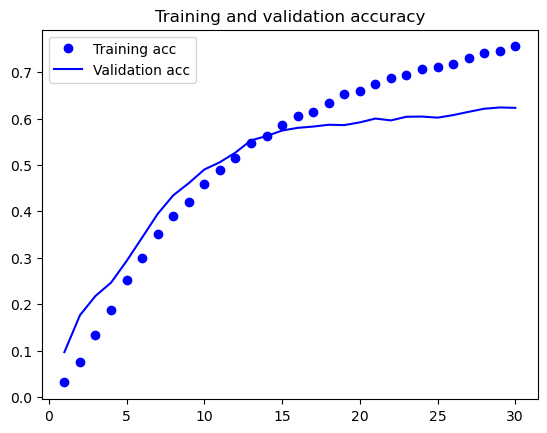

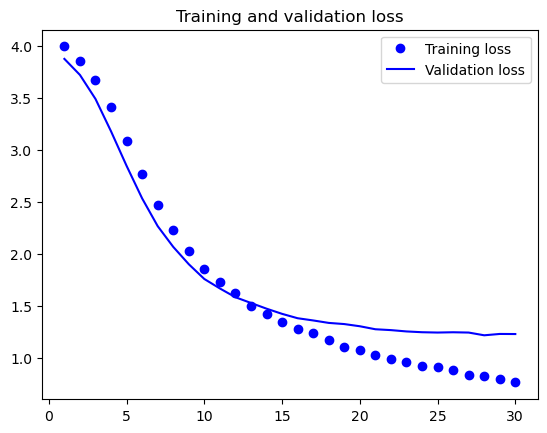

In [22]:
trainacc = []
trainloss = []
valacc = []
valloss = []
for i in range (len(history)):
    trainacc.append(history[i].history['accuracy'])
    trainloss.append(history[i].history['loss'])
    valacc.append(history[i].history['val_accuracy'])
    valloss.append(history[i].history['val_loss'])

acc = np.mean(trainacc, axis=0)
val_acc = np.mean(valacc, axis=0)
loss = np.mean(trainloss, axis=0)
val_loss = np.mean(valloss, axis=0)
epochs = range(1, len(acc) + 1)

now = datetime.datetime.now()
os.mkdir('./gan_1/{}_{}'.format(now.strftime("%Y%m%d-%H%M%S"),threshold))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()#作用是加上图例，很有必要
plt.savefig("./gan_1/{}_{}/real_TRandVAL_acc.png".format(now.strftime("%Y%m%d-%H%M%S"),threshold))
plt.figure()#创建新图
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("./gan_1/{}_{}/real_TRandVAL_loss.png".format(now.strftime("%Y%m%d-%H%M%S"),threshold))
test_loss = np.mean(all_test_loss, axis=0)
test_acc = np.mean(all_test_acc, axis=0)
test_loss,test_acc

### classification in gen+real

In [33]:
train_gan1 = train_gan
train_gan1[110-abs(train_gan1)<threshold]=-110 #空值滤波
x_train_gan1, y_train_gan = shuffle(train_gan1, labels_gan, random_state=selection_seed)

# scaler1 = StandardScaler().fit(x_train_gan1)
X_train_gan_transformed = scaler.transform(x_train_gan1)
Y_train_gan_encoded = to_categorical(y_train_gan)

In [37]:
all_test_loss_gan =[]
all_test_acc_gan = []
ganhistory = []

for i in tqdm_notebook(range(times_to_run)):
    seed(i*seed_multiplier)
    tf.random.set_seed(i*seed_multiplier)

    inp = Input(shape=(data_shape[0],),name='ap_features')
    x = Dense(1024,activation=LeakyReLU(alpha=0.2))(inp)
    x = Dropout(0.3)(x)
    x = Dense(512,activation=LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.3)(x)
    x = Dense(256,activation=LeakyReLU(alpha=0.2))(x)
    x = Dropout(0.3)(x)
    x = Dense(128,activation=LeakyReLU(alpha=0.2))(x)
    output = Dense(54,activation='softmax')(x)
    model = Model(inp,output)

    model.compile(optimizer=Adam(0.0002, 0.5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    ganhistorytemp = model.fit(X_train_gan_transformed,
                    Y_train_gan_encoded,
                    epochs=mlp_epochs-10,
                    batch_size=32,
                    validation_split=0.3,
                    verbose = 0)
    ganhistory.append(ganhistorytemp)

    test_loss, test_acc = model.evaluate(X_test_transformed, 
                                         Y_test_encoded, 
                                         verbose=0)
    print("#{} Test acc:".format(i), test_acc)

    all_test_acc_gan.append(test_acc)
    all_test_loss_gan.append(test_loss)
    del(model)
    clear_session()

C:\Users\xfp\AppData\Local\Temp\ipykernel_3824\309911505.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(times_to_run)):


  0%|          | 0/10 [00:00<?, ?it/s]

#0 Test acc: 0.6933962106704712
#1 Test acc: 0.7028301954269409
#2 Test acc: 0.7169811129570007
#3 Test acc: 0.7358490824699402
#4 Test acc: 0.6933962106704712
#5 Test acc: 0.6933962106704712
#6 Test acc: 0.7358490824699402
#7 Test acc: 0.6698113083839417
#8 Test acc: 0.698113203048706
#9 Test acc: 0.6792452931404114


In [35]:
knn1 = neighbors.KNeighborsClassifier(n_neighbors =1)
knn1.fit(train_gan,labels_gan)
acc1 = knn1.score(x_test,y_test) 
print('the accurancy is: %.4f'  %acc1)

the accurancy is: 0.7736


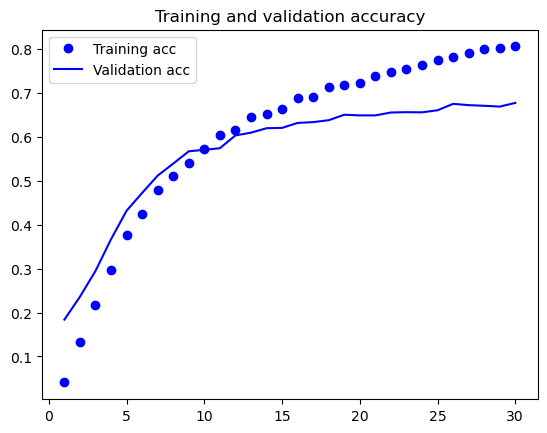

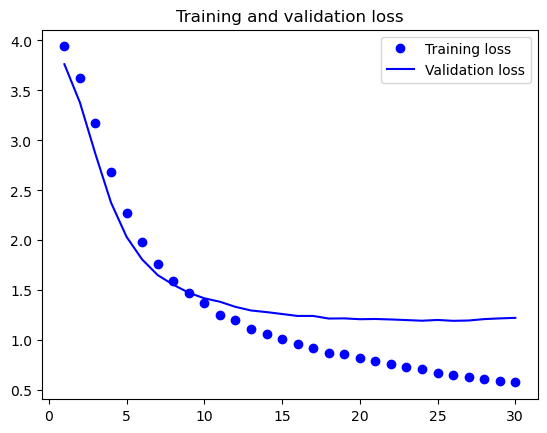

In [38]:
gan_trainacc = []
gan_trainloss = []
gan_valacc = []
gan_valloss = []
for i in range (len(ganhistory)):
    gan_trainacc.append(ganhistory[i].history['accuracy'])
    gan_trainloss.append(ganhistory[i].history['loss'])
    gan_valacc.append(ganhistory[i].history['val_accuracy'])
    gan_valloss.append(ganhistory[i].history['val_loss'])

acc = np.mean(gan_trainacc, axis=0)
val_acc = np.mean(gan_valacc, axis=0)
loss = np.mean(gan_trainloss, axis=0)
val_loss = np.mean(gan_valloss, axis=0)
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()#作用是加上图例，很有必要
# plt.savefig("./gan_1/{}_{}/gen+real_TRandVAL_acc.png".format(now.strftime("%Y%m%d-%H%M%S"),threshold))
plt.figure()#创建新图
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
# plt.savefig("./gan_1/{}_{}/gen+real_TRandVAL_loss.png".format(now.strftime("%Y%m%d-%H%M%S"),threshold))
# test_loss = np.mean(all_test_acc_gan, axis=0)
# test_acc = np.mean(all_test_acc_gan, axis=0)

In [27]:
AccMean = np.mean(all_test_acc)
LossMean = np.mean(all_test_loss)
AccStd = np.std(all_test_acc)
LossStd = np.std(all_test_loss)

GanAccMean = np.mean(all_test_acc_gan)
GanLossMean = np.mean(all_test_loss_gan)
GanAccStd = np.std(all_test_acc_gan)
GanLossStd = np.std(all_test_loss_gan)

lines  = list()
lines.append("Accuracy mean: {}".format(AccMean))
lines.append("Loss mean: {}".format(LossMean))
lines.append("Accuracy STD: {}".format(AccStd))
lines.append("Loss STD: {} \n".format(LossStd))
lines.append("Maximum Accuracy: {}".format(np.max(all_test_acc)))
lines.append("Loss of Maximum Accuracy: {}\n".format(
    all_test_loss[np.argmax(all_test_acc)]))
lines.append("acc of the KNN: %.4f"%knn_acc)
# for m in range(len(acc)):
#     lines.append("K = {}, acc = {}".format(m+1,acc[m]))
    
lines.append("\n ================== \n")

lines.append("Accuracy mean: {}".format(GanAccMean))
lines.append("Loss mean: {}".format(GanLossMean))
lines.append("Accuracy STD: {}".format(GanAccStd))
lines.append("Loss STD: {} \n".format(GanLossStd))
lines.append("Maximum Accuracy: {}".format(np.max(all_test_acc_gan)))
lines.append("Loss of Maximum Accuracy: {}\n".format(
    all_test_loss_gan[np.argmax(all_test_acc_gan)]))
lines.append("acc of the KNN: %.4f"%acc1)
# for n in range(len(acc1)):
#     lines.append("K = {}, acc = {}".format(n+1,acc1[n]))
    
# file_dir = "./gan_1/{}_{}/test.txt".format(now.strftime("%Y%m%d-%H%M%S"),threshold)
# with open(file_dir, "w") as filehandle:
#     for items in lines:
#         filehandle.write('%s\n' % items)